# Advanced regression techniques and practice feature engineering with House Price dataset.

The main purpose of this notebook is to practic aquired knowlege of machine learning and Python to predict price of each house.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("data/train.csv")
train_df = data.copy()
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data = pd.read_csv("data/test.csv")
test_df = test_data.copy()
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
test_df.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [6]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

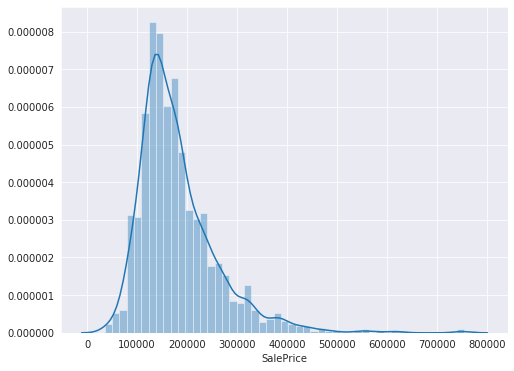

In [7]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.distplot(train_df["SalePrice"])

**Question:** Do I have to deal with skewnes in numerical columns?

In [8]:
print("Skewness: %f" %train_df["SalePrice"].skew())
print("Kurtosis: %f" %train_df["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [9]:
train_df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [10]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [13]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


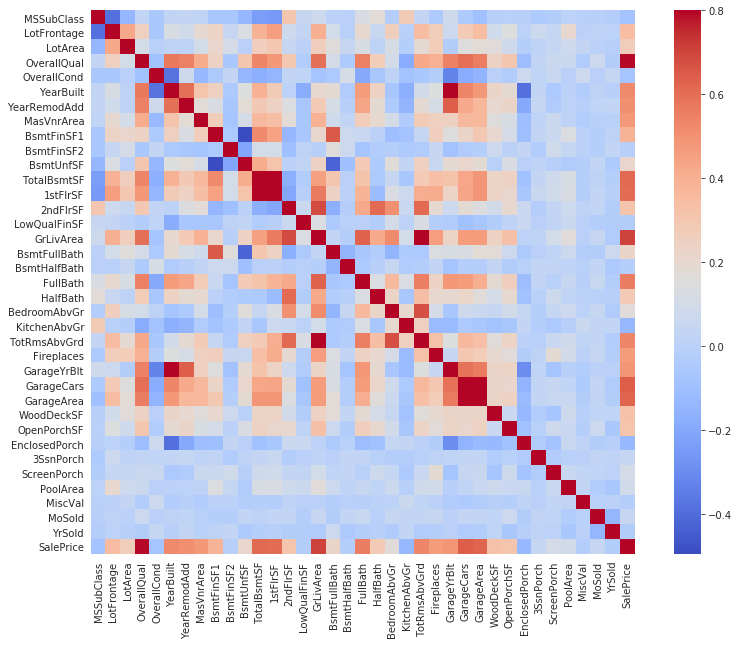

In [14]:
corr_mat = train_df.drop(["Id"], axis=1).corr()

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(corr_mat, vmax=0.8, square=True, cmap="coolwarm")

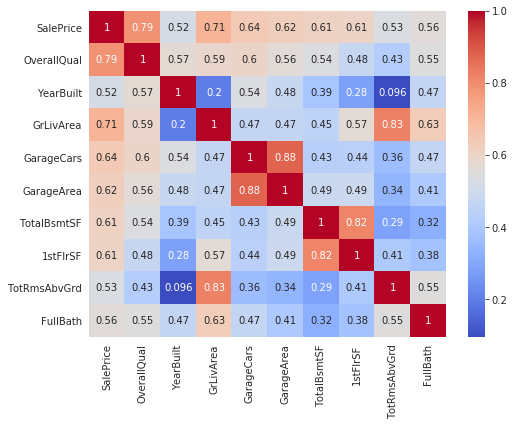

In [15]:
corr_list = ["SalePrice","OverallQual","YearBuilt","GrLivArea", "GarageCars","GarageArea",
             "TotalBsmtSF","1stFlrSF","TotRmsAbvGrd","FullBath"]
corr_mat_price = train_df[corr_list].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_mat_price, cmap="coolwarm", annot=True)

It looks like some features are strongly correlated and it can indicate multicollinearity.

In [16]:
# Missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/ train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [17]:
# Drop columns where missing values are more than 25% of our dataset
list_to_drop = ["PoolQC", "MiscFeature","Alley","Fence","FireplaceQu"]
train_df.drop(list_to_drop, axis=1, inplace=True)
test_df.drop(list_to_drop, axis=1, inplace=True)

I will also remove all Garage features except GarageCars which is the most correlated with SalePrice. The same logic I apply to Bsm features and I will leave TotalBsmtSF

In [18]:
garage_list_to_drop = ["GarageCond","GarageType","GarageYrBlt","GarageFinish","GarageQual"]
bsm_list_to_drop = ["BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual"]

train_df.drop(garage_list_to_drop, axis=1, inplace=True)
train_df.drop(bsm_list_to_drop, axis=1, inplace=True)

# Same to test dataframe
test_df.drop(garage_list_to_drop, axis=1, inplace=True)
test_df.drop(bsm_list_to_drop, axis=1, inplace=True)

In [19]:
# Drop columns with strong correlation
train_df.drop(["GarageArea", "1stFlrSF","TotRmsAbvGrd"], axis=1, inplace=True)
test_df.drop(["GarageArea", "1stFlrSF","TotRmsAbvGrd"], axis=1, inplace=True)

In [20]:
train_df["MasVnrType"][0]

'BrkFace'

In [21]:
# Check the rest of missing data
train_df["MasVnrType"].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [22]:
train_df["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [23]:
# Fill missing values in categorical columns
train_df["MasVnrType"] = train_df["MasVnrType"].fillna(train_df["MasVnrType"].mode()[0])
test_df["MasVnrType"] = test_df["MasVnrType"].fillna(test_df["MasVnrType"].mode()[0])

In [24]:
train_df["Electrical"] = train_df["Electrical"].fillna(train_df["Electrical"].mode()[0])
test_df["Electrical"] = test_df["Electrical"].fillna(test_df["Electrical"].mode()[0])

In [25]:
# Fill missing values in numerical columns
num_col = ["LotFrontage","MasVnrArea"]
for col in num_col:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

Id column we do not need as well, but I save test_df id for submission

In [26]:
test_df.shape

(1459, 62)

In [27]:
train_df.drop(["Id"], axis=1, inplace=True)

In [28]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [29]:
discrete=[]
for col in train_df.columns:
    if train_df[col].dtype=='int64' and len(train_df[col].unique()) <=16:
        discrete.append(col)
        
for col in discrete:
    print(f"{col} has {train_df[col].unique()} unique ({train_df[col].dtype})")

MSSubClass has [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] unique (int64)
OverallQual has [ 7  6  8  5  9  4 10  3  1  2] unique (int64)
OverallCond has [5 8 6 7 4 2 3 9 1] unique (int64)
BsmtFullBath has [1 0 2 3] unique (int64)
BsmtHalfBath has [0 1 2] unique (int64)
FullBath has [2 1 3 0] unique (int64)
HalfBath has [1 0 2] unique (int64)
BedroomAbvGr has [3 4 1 2 0 5 6 8] unique (int64)
KitchenAbvGr has [1 2 3 0] unique (int64)
Fireplaces has [0 1 2 3] unique (int64)
GarageCars has [2 3 1 0 4] unique (int64)
PoolArea has [  0 512 648 576 555 480 519 738] unique (int64)
MoSold has [ 2  5  9 12 10  8 11  4  1  7  3  6] unique (int64)
YrSold has [2008 2007 2006 2009 2010] unique (int64)


In [30]:
discrete2=[]
for col in test_df.columns:
    if test_df[col].dtype=='int64' and len(test_df[col].unique()) <=16:
        discrete2.append(col)
        
for col in discrete2:
    print(f"{col} has {test_df[col].unique()} unique ({test_df[col].dtype})")

MSSubClass has [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150] unique (int64)
OverallQual has [ 5  6  8  7  4  9  2  3 10  1] unique (int64)
OverallCond has [6 5 7 8 2 9 3 4 1] unique (int64)
LowQualFinSF has [   0  362 1064  431  436  259  312  108  697  512  114  205   80  140
  450] unique (int64)
FullBath has [1 2 3 4 0] unique (int64)
HalfBath has [0 1 2] unique (int64)
BedroomAbvGr has [2 3 4 1 6 5 0] unique (int64)
KitchenAbvGr has [1 2 0] unique (int64)
Fireplaces has [0 1 2 3 4] unique (int64)
3SsnPorch has [  0 224 255 225 360 150 153 174 120 219 176  86 323] unique (int64)
PoolArea has [  0 144 368 444 228 561 800] unique (int64)
MoSold has [ 6  3  1  4  5  2  7 10  8 11  9 12] unique (int64)
YrSold has [2010 2009 2008 2007 2006] unique (int64)


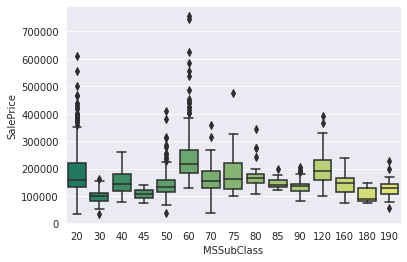

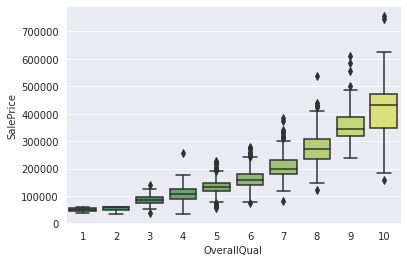

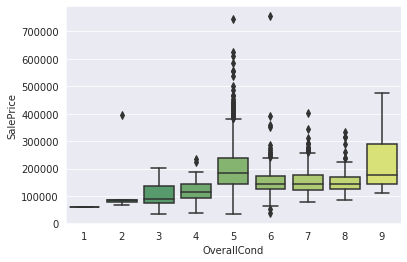

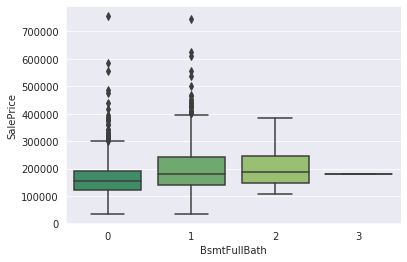

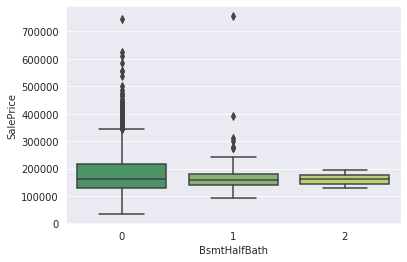

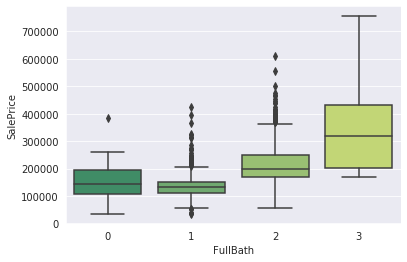

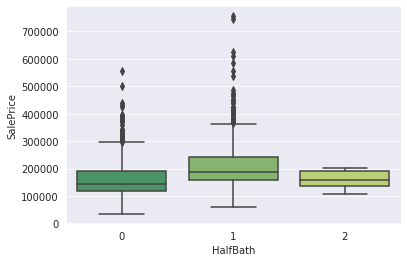

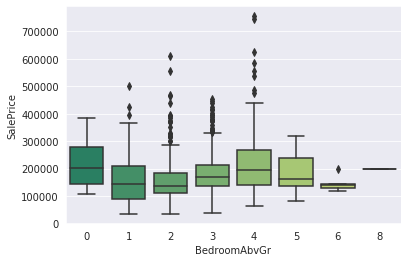

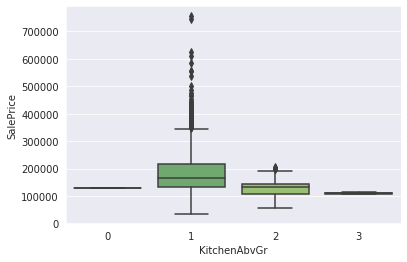

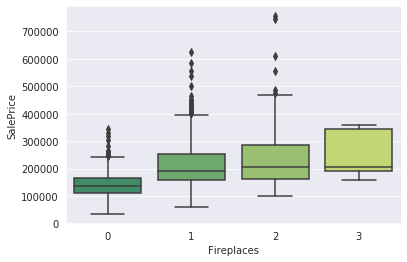

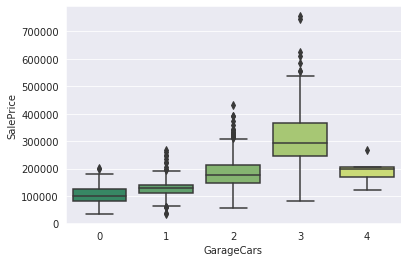

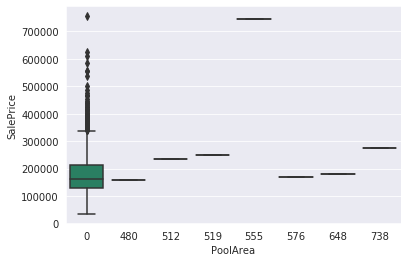

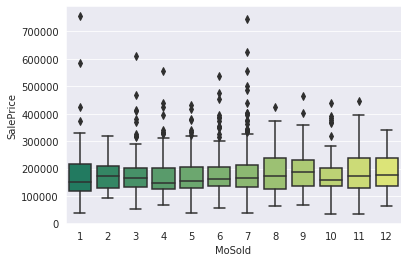

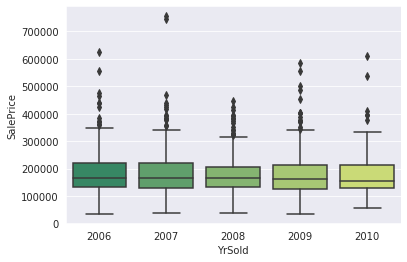

In [31]:
for col in discrete:
    fig, ax = plt.subplots()
    sns.boxplot(col,"SalePrice", data=train_df, palette="summer")

In [32]:
# Convert columns with discrete values into object type

train_df[discrete] = train_df[discrete].astype(object)
test_df[discrete2] = test_df[discrete2].astype(object)

In [33]:
train_df.dtypes.value_counts()

object     43
int64      17
float64     2
dtype: int64

In [34]:
num = []
for col in train_df.columns:
    if train_df[col].dtype !="O" and col not in discrete:
        num.append(col)

In [35]:
num

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [36]:
numeric_df = train_df[num].copy()
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  WoodDeckSF     1460 non-null   int64  
 13  OpenPorchSF    1460 non-null   int64  
 14  EnclosedPorch  1460 non-null   int64  
 15  3SsnPorch      1460 non-null   int64  
 16  ScreenPorch    1460 non-null   int64  
 17  MiscVal        1460 non-null   int64  
 18  SalePric

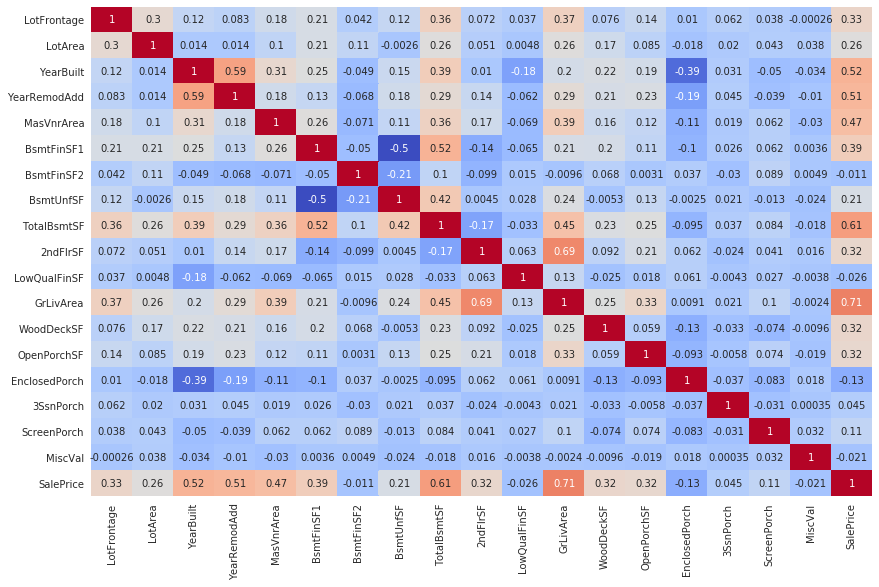

In [37]:
plt.figure(figsize=(14,9))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True,cbar=False);

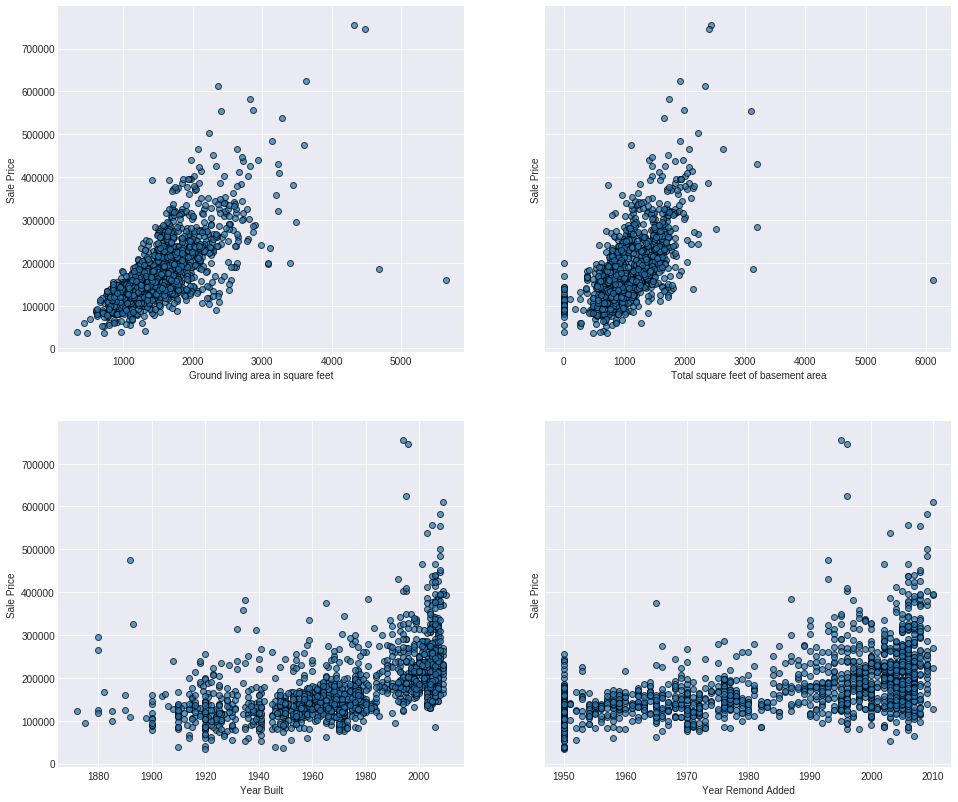

In [38]:
plt.style.use("seaborn-darkgrid")
# Let's plot some most correlated with saleprice column
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(16,14),
                                             sharey=True)

ax1.scatter(x=train_df["GrLivArea"],y=train_df["SalePrice"],edgecolor="k", alpha=0.7)
ax1.set(ylabel="Sale Price",
        xlabel="Ground living area in square feet")


ax2.scatter(train_df["TotalBsmtSF"],train_df["SalePrice"],edgecolor="k", alpha=0.7)
ax2.set(ylabel="Sale Price",
        xlabel="Total square feet of basement area")

ax3.scatter(train_df["YearBuilt"], train_df["SalePrice"], edgecolor="k", alpha=0.7)
ax3.set(ylabel="Sale Price",
        xlabel="Year Built")

ax4.scatter(train_df["YearRemodAdd"], train_df["SalePrice"], edgecolor="k", alpha=0.7)
ax4.set(ylabel="Sale Price",
        xlabel="Year Remond Added");

In [39]:
# Create category dataframe
cat = []
for col in train_df.columns:
    if train_df[col].dtype == "O":
        cat.append(col)

In [40]:
cat_df = train_df[cat].copy()
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

In [41]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  WoodDeckSF     1460 non-null   int64  
 13  OpenPorchSF    1460 non-null   int64  
 14  EnclosedPorch  1460 non-null   int64  
 15  3SsnPorch      1460 non-null   int64  
 16  ScreenPorch    1460 non-null   int64  
 17  MiscVal        1460 non-null   int64  
 18  SalePric

There are 2 columns which are numerical but should be object

In [42]:
train_df["YearBuilt"].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

In [43]:
train_df["YearRemodAdd"].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

Let's change them to category

In [44]:
cols = ["YearBuilt","YearRemodAdd"]
for col in cols:
    train_df[col] = train_df[col].astype(object)
    test_df[col] = test_df[col].astype(object)

In [45]:
train_df["YearBuilt"].dtype

dtype('O')

In [46]:
test_df.dtypes.value_counts()

object     44
int64       9
float64     9
dtype: int64

In [47]:
train_df.dtypes.value_counts()

object     45
int64      15
float64     2
dtype: int64

In [48]:
# I do not need this
# # For train_df
# train_cat_df = train_df.select_dtypes(include=["object"]).copy()
# train_num_df = train_df.select_dtypes(include=["int64","float64"]).copy()

# # For test_df
# test_cat_df = test_df.select_dtypes(include=["object"]).copy()
# test_num_df = test_df.select_dtypes(include=["int64", "float64"]).copy()

Train dataset is clean however there are some missing values in test datasets. It's turned out to be string and it couldn't change it in the first place. This is something we should look for when we dealing with missing values. 

In [49]:
test_df.select_dtypes(include=["object"]).isnull().sum()

MSSubClass       0
MSZoning         4
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
LowQualFinSF     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
Functional       2
Fireplaces       0
PavedDrive       0
3SsnPorch        0
PoolArea         0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
dtype: int64

In [50]:
o_list = ["MSZoning","Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional","SaleType"]

for col in o_list:
    test_df[col] = test_df[col].fillna(str(test_df[col].mode()))

In [51]:
l_list = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars"]
for col in l_list:
    test_df[col] = test_df[col].fillna(test_df[col].median())

In [52]:
test_df.select_dtypes(include=["object"]).isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
LowQualFinSF     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces       0
PavedDrive       0
3SsnPorch        0
PoolArea         0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [53]:
test_df.select_dtypes(include=["int64","float64"]).isnull().sum()

Id               0
LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
MiscVal          0
dtype: int64

In [54]:
train_df.select_dtypes(include=["int64","float64"]).isnull().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MiscVal          0
SalePrice        0
dtype: int64

In [55]:
#test_df = test_df.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()))

## Checkpoint
Let's make copies of our cleaned data so when we deal with skewness of our numeric data
 won't make any different when we first train our model with skewed data

In [55]:
train_prep = train_df.copy()
test_prep = test_df.copy()

In [57]:
# Save dataframe without missing data
train_df.to_csv("data/house_price_train_no_missing_data.csv")
test_df.to_csv("data/house_price_test_no_missing_data.csv")

### Normalize numerical columns

* Because of the skewness of continues columns do I have to first deal with it first and than normalize them?
* What about price sale column?

In [57]:
# Determine index for continous variables 
num_feat = train_df.dtypes[train_df.dtypes !="object"].index
# Calculate skew and sort
skew_feats = train_df[num_feat].skew().sort_values(ascending=False)
kurt_feat = train_df[num_feat].kurt().sort_values(ascending=False)
skewness = pd.DataFrame({"Skewness": skew_feats,
                         "Kurtosis": kurt_feat})
skewness

,Skewness,Kurtosis
2ndFlrSF,0.813030,-0.553464
3SsnPorch,10.304342,123.662379
BsmtFinSF1,1.685503,11.118236
BsmtFinSF2,4.255261,20.113338
BsmtUnfSF,0.920268,0.474994
EnclosedPorch,3.089872,10.430766
GrLivArea,1.366560,4.895121
LotArea,12.207688,203.243271
LotFrontage,2.409147,21.912954
LowQualFinSF,9.011341,83.234817


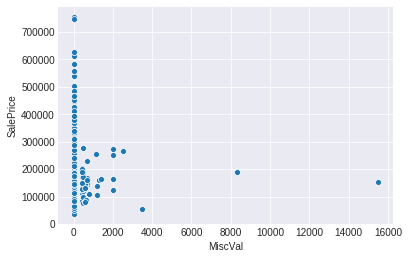

In [58]:
sns.scatterplot(train_df.MiscVal, train_df.SalePrice)

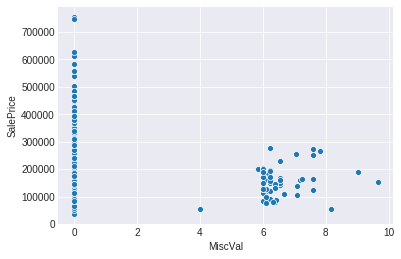

In [59]:
log_MiscVal = np.log1p(train_df.MiscVal)

sns.scatterplot(log_MiscVal, train_df.SalePrice)

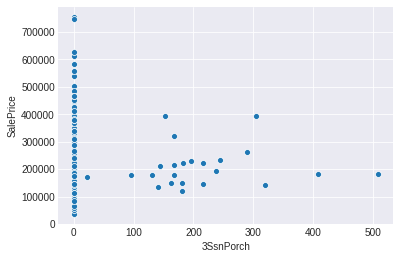

In [60]:
sns.scatterplot(train_df["3SsnPorch"], train_df.SalePrice)

Do I have to do it for my dependent variable?

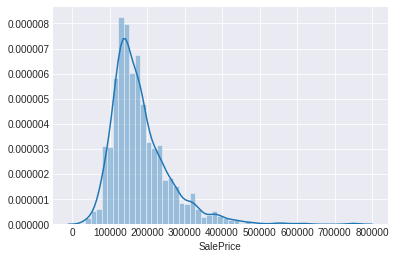

In [61]:
sns.distplot(train_df.SalePrice);

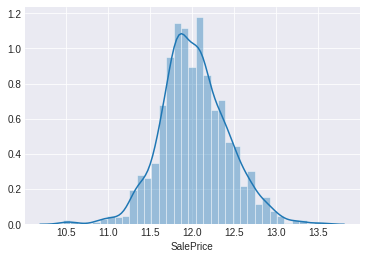

In [62]:
# This is looking better
sns.distplot(np.log1p(train_df.SalePrice));

In [63]:
num_feat = num_feat.drop("SalePrice")

In [64]:
num_feat

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal'],
      dtype='object')

In [65]:
for col in num_feat:
    train_df[col] = train_df[col].apply(lambda x: np.log1p(x))
    test_df[col] = train_df[col].apply(lambda x: np.log1p(x))

In [66]:
skew_feat_log = train_df[num_feat].skew().sort_values(ascending=False)
kurt_feat_log = train_df[num_feat].skew().sort_values(ascending=False)
skewness2 = pd.DataFrame({"Skewness": skew_feat_log,
                          "Kurtosis": kurt_feat_log})
skewness2

,Skewness,Kurtosis
3SsnPorch,7.734975,7.734975
LowQualFinSF,7.460317,7.460317
MiscVal,5.170704,5.170704
ScreenPorch,3.150409,3.150409
BsmtFinSF2,2.523694,2.523694
EnclosedPorch,2.112275,2.112275
MasVnrArea,0.503532,0.503532
2ndFlrSF,0.289643,0.289643
WoodDeckSF,0.153537,0.153537
GrLivArea,-0.006140,-0.006140


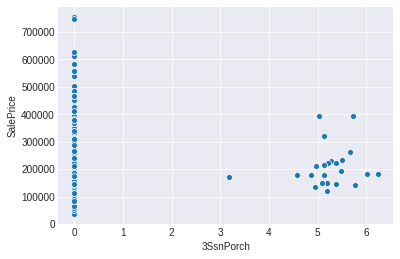

In [67]:
sns.scatterplot(train_df["3SsnPorch"], train_df.SalePrice)

It looks like skewness is because lots of 0 in the columns, and when I try to log them there is a problem of dividing by 0. So this is something I will look and see if dealing with skewed data make any improvement in our model.
I've just found out that np.log1p(x+1) sort division by zero issue.

## It is a goog practice to typecast categorical features to a category type because they make the operation on such columns much faster then the object types.

In [68]:
train_prep.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [69]:
for col in train_prep.select_dtypes(["object"]):
    train_prep[col] = train_prep[col].astype("category")

In [70]:
for col in test_prep.select_dtypes(["object"]):
    test_prep[col] = test_prep[col].astype("category")

In [71]:
test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   category
 2   MSZoning       1459 non-null   category
 3   LotFrontage    1459 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   LotShape       1459 non-null   category
 7   LandContour    1459 non-null   category
 8   Utilities      1459 non-null   category
 9   LotConfig      1459 non-null   category
 10  LandSlope      1459 non-null   category
 11  Neighborhood   1459 non-null   category
 12  Condition1     1459 non-null   category
 13  Condition2     1459 non-null   category
 14  BldgType       1459 non-null   category
 15  HouseStyle     1459 non-null   category
 16  OverallQual    1459 non-null   category
 17  OverallCond    1459 non-null   ca

In [72]:
pd.Categorical(train_prep["KitchenQual"]).codes

array([2, 3, 2, ..., 2, 2, 3], dtype=int8)

### Transform categorical columns with LabelEncoder

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
cat_list = train_prep.select_dtypes("category").columns

le = LabelEncoder()

for col in cat_list:
    train_prep[col] = le.fit_transform(train_prep[col])

In [75]:
train_df.shape

(1460, 62)

In [76]:
cat_list2 = test_prep.select_dtypes("category").columns

le2 = LabelEncoder()

for col in cat_list2:
    test_prep[col] = le2.fit_transform(test_prep[col])

In [77]:
train_prep.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,1,2,8,4,208500
1,0,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,4,1,8,4,181500
2,5,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,8,2,8,4,223500
3,6,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,1,0,8,0,140000
4,5,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,11,2,8,4,250000


>Now I've got all columns as numerical should I standarized?

### Let' split the data into X_train, y_train, X_test for submission

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = train_prep.drop(["SalePrice"], axis=1)
y = np.log1p(train_prep["SalePrice"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=45)

In [80]:
# import model and check how it performs
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

# Instantiate model
rfc_model = RandomForestRegressor().fit(X_train, y_train)

# Predictions
y_pred = rfc_model.predict(X_test)

# R-squared
print(f"Random Forest R-squared: {rfc_model.score(X_test, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Random Forest R-squared: 0.8607253046542381
RMSE: 0.15848080186874747


In [81]:
# Gradien boost Regressor
gbr_model_base = GradientBoostingRegressor(random_state=45).fit(X_train, y_train)

# Model base score
gbr_cv_base_score = gbr_model_base.score(X_test, y_test)

# Predictions
y_pred_gbr = gbr_model_base.predict(X_test)

print(f"Gradient Boost R-squared: {gbr_cv_base_score}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gbr))}")

Gradient Boost R-squared: 0.8911742937474849
RMSE: 0.1400897300871787


### Let's check whether model improves( I use log on numerical features)

In [82]:
# Copy of dataframe where numeric variables are logged
train_df_log = train_df.copy()
test_df_log = test_df.copy()

# Change object type into category in train set
for col in train_df_log.select_dtypes(["object"]):
    train_df_log[col] = train_df_log[col].astype("category")
    
# Change object type into category in test set
for col in test_df_log.select_dtypes(["object"]):
    test_df_log[col] = test_df_log[col].astype("category")
    
# Change category into numeric for machine learning
cat_list = train_df_log.select_dtypes("category").columns
cat_list2 = test_df_log.select_dtypes("category").columns

# Training Dataset
le = LabelEncoder()
for col in cat_list:
    train_df_log[col] = le.fit_transform(train_df_log[col])
# Test Dataset
le2 = LabelEncoder()
for col in cat_list2:
    test_df_log[col] = le2.fit_transform(test_df_log[col])

In [83]:
# Split data into X & y and than on training and test sets
X = train_df_log.drop(["SalePrice"], axis=1)
y = np.log1p(train_df_log["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=45)

In [84]:
# Instantiale and fit model
rfc_model_log = RandomForestRegressor(random_state=45).fit(X_train, y_train)

# Make predictions
y_pred_rfc_log = rfc_model_log.predict(X_test)
# R-squared
log_score_rfc = rfc_model_log.score(X_test, y_test)

print(f"R-squared: {round(log_score_rfc,2)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rfc_log))}")

R-squared: 0.86
RMSE: 0.15845987573725173


In [85]:
# Gradien boost Regressor
gbr_model_log = GradientBoostingRegressor(random_state=45).fit(X_train, y_train)

# Make predictions
y_pred_log_gbr = gbr_model_log.predict(X_test)

# R-squared
log_score_gbr = gbr_model_log.score(X_test, y_test)

print(f"R-squared: {round(log_score_gbr,2)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_log_gbr))}")

R-squared: 0.89
RMSE: 0.14007266072277813


## Make prediction on test dataset and create submission with Gradient Boost and see where we end up.

In [86]:
newTest = test_df_log.drop("Id", axis=1)

In [95]:
predictions = gbr_model_log.predict(newTest)
predictions

array([11.40294477, 11.40929313, 11.57184824, ..., 11.5716649 ,
       11.35267841, 11.89247071])

In [98]:
# # Submit predictions
# submission1 = pd.DataFrame()
# submission1["Id"] = test_df_log["Id"]
# submission1["SalePrice"] = predictions
# submission1.to_csv("submission1.csv", index=False)

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

# How improve model to get better score.
1. Try normalization MinMax()
2. Feature selection.
3. improve models hyperparameters
4. Try diffrent model e.g. SVR or Ridge Regression

**Most common feature selection**

In [105]:
train_df_log.shape, test_df_log.shape

((1460, 62), (1459, 62))

In [131]:
X = train_df_log.drop(["SalePrice"], axis=1)
y = np.log1p(train_df_log["SalePrice"])

In [132]:
from sklearn.feature_selection import SelectKBest, f_regression

In [140]:
selectorK = SelectKBest(score_func=f_regression,k=40)

In [141]:
X_k  = selectorK.fit_transform(X,y)

In [142]:
f_score = selectorK.scores_
p_values = selectorK.pvalues_

In [143]:
columns = list(X.columns)
print(" ")
print(" ")
print(" ")
print("  Feature   ", "   F-Score  ", "    P-Values  ")
print(" ---------       ---------   --------")

for i in range(0, len(columns)):
    f1 = "% 4.2f" % f_score[i]
    p1 = "% 2.6f" % p_values[i]
    print("",columns[i].ljust(12), f1.rjust(8), "   ", p1.rjust(8))

 
 
 
  Feature       F-Score       P-Values  
 ---------       ---------   --------
 MSSubClass       1.84      0.175362
 MSZoning        53.93      0.000000
 LotFrontage    198.59      0.000000
 LotArea        277.59      0.000000
 Street           4.81      0.028380
 LotShape       122.20      0.000000
 LandContour      1.53      0.216839
 Utilities        0.23      0.629609
 LotConfig        7.79      0.005331
 LandSlope        2.17      0.141191
 Neighborhood    61.82      0.000000
 Condition1      19.85      0.000009
 Condition2       0.00      0.959590
 BldgType         7.72      0.005542
 HouseStyle      70.47      0.000000
 OverallQual   2930.80      0.000000
 OverallCond      1.98      0.159127
 YearBuilt      812.63      0.000000
 YearRemodAdd   685.84      0.000000
 RoofStyle       52.78      0.000000
 RoofMatl        17.05      0.000038
 Exterior1st     22.02      0.000003
 Exterior2nd     23.44      0.000001
 MasVnrType       0.36      0.546874
 MasVnrArea     300.39     

In [144]:
X_k.shape

(1460, 40)

In [145]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_k,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=45)

In [146]:
# Instantiate new model
gbr_model_f = GradientBoostingRegressor(random_state=45).fit(X_train, y_train)

# Model score
gbr_model_f_score = gbr_model_f.score(X_test, y_test)

# Predictions
y_pred_f_gbr = gbr_model_f.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_f_gbr))

print("Gradient Boost with fewer features")
print(f"R-squared: {gbr_model_f_score}")
print(f"RMSE: {rmse}")

Gradient Boost with fewer features
R-squared: 0.8841035613774578
RMSE: 0.1445691397379008


looks like this didn't improve our model. Let's try something different

### Feature ranking with recursive feature elimination

In [178]:
from sklearn.feature_selection import RFE

model_gbr = GradientBoostingRegressor(random_state=45)

rfe = RFE(estimator=model_gbr,
          n_features_to_select=35, 
          step=1)

rfe.fit(X,y)

X_reduced = rfe.transform(X)

In [179]:
# Get the feature names
columns = list(X.columns)
# Get the ranking of the features
ranking = rfe.ranking_

rfe_selected = pd.DataFrame()
rfe_selected = pd.concat([pd.DataFrame(columns),
                          pd.DataFrame(ranking)],
                         axis=1)
rfe_selected.columns = ["Feature_names","Ranking"]

In [185]:
rfe_selected = rfe_selected.sort_values(by=["Ranking"], ascending=False)[:30]

In [181]:
rfe.score(X,y)

0.9543978606104346

In [182]:
X_reduced.shape

(1460, 35)

In [188]:
rfe_selected

,Feature_names,Ranking
56,MiscVal,27
53,3SsnPorch,26
4,Street,25
13,BldgType,24
9,LandSlope,23
22,Exterior2nd,22
7,Utilities,21
35,Electrical,20
40,BsmtHalfBath,19
0,MSSubClass,18


It is not finished

### Improve model hyperparametrs

In [198]:
X = train_df_log.drop(["SalePrice"],axis=1)
y = np.log1p(train_df_log["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2)

In [199]:
from sklearn.model_selection import GridSearchCV

gbr_param = {"loss": ["ls","lad","huber","quantile"],
             "learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
             "n_estimators": [100, 200, 300, 500],
             "criterion":["friedman_mse", "mse", "mae"],
             "max_features": ["auto","sqrt","log2"]}

In [200]:
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=45),
                        param_grid=gbr_param,
                        n_jobs=-1,
                        cv=3)‘friedman_mse’, ‘mse’, ‘mae’
gbr_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [203]:
gbr_grid.best_score_

0.9077092273984424

In [204]:
gbr_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'huber',
 'max_features': 'log2',
 'n_estimators': 300}

In [213]:
best_gbr_model =GradientBoostingRegressor(criterion="friedman_mse",
                                          learning_rate=0.1,
                                          loss="huber",
                                          max_features="log2",
                                          n_estimators=300,
                                          random_state=45)
# Fit the model
best_gbr_model.fit(X_train, y_train)
# Make prediction
y_pred_best = best_gbr_model.predict(X_test)
# R-squared
best_score = best_gbr_model.score(X_test, y_test)
# RMSE
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"R-squared: {round(best_score,2)}")
print(f"RMSE: {best_rmse}")

R-squared: 0.83
RMSE: 0.16814370244687088


In [215]:
from sklearn.model_selection import cross_val_score

gbr_cv = cross_val_predict(best_gbr_model,
                           X_train,
                           y_train,
                           n_jobs=-1,
                           verbose=1,
                           cv=5)

cv_rmse = np.sqrt(mean_squared_error(y_train, gbr_cv))
print(f"RMSE: {cv_rmse}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


RMSE: 0.11705149190305296


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


In [218]:
# Nothing change, I'll start new models
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)

svr_score = svr_model.score(X_test, y_test)
svr_y_pred = svr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, svr_y_pred))

print(f"R-squared: {round(svr_score,2)}")
print(f"RMSE: {rmse}")

R-squared: 0.75
RMSE: 0.20474179855035587


In [221]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0, max_iter=1000,)
ridge_model.fit(X_train, y_train)

rg_score = ridge_model.score(X_test, y_test)
rg_y_pred = ridge_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, rg_y_pred))

print(f"R-squared: {round(rg_score,2)}")
print(f"RMSE: {rmse}")

R-squared: 0.81
RMSE: 0.18019612680457356
